<a href="https://colab.research.google.com/github/pjcroxas/Bike_Sharing_Analysis/blob/main/Analyzing_Bike_Sharing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import warnings
warnings.filterwarnings('ignore')

# **I. Load Data**

In [2]:
dirs = "/content/drive/My Drive/Data Science Portfolio/2024/Digital Marketing/Bike Sharing/Data"

import os
files = []
for dirname, _, filenames in os.walk(dirs):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        file_name = os.path.join(dirname, filename)
        files.append(file_name)
if len(files) == 12:
  print("File names are loaded successfully!")

File names are loaded successfully!


In [3]:
def concatenate_csv_files(file_paths):
    """
    Reads multiple CSV files from a list of file paths and concatenates them into a single DataFrame.

    Parameters:
    - file_paths: A list of strings where each string is the path to a CSV file
    - output_file: Path to the output CSV file where the concatenated DataFrame will be saved

    Returns:
    - A DataFrame containing the concatenated data
    """
    if not file_paths:
        raise ValueError("The list of file paths is empty.")

    # Read and concatenate all CSV files
    df_list = [pd.read_csv(file_path) for file_path in file_paths]
    concatenated_df = pd.concat(df_list, ignore_index=True)

    # Save the concatenated DataFrame to a new CSV file

    return concatenated_df


if __name__ == "__main__":
    concatenated_data = concatenate_csv_files(files)

Concatenation complete. The result is saved in 'output/concatenated_data.csv'.


In [4]:
# back-up the raw data
bike_share_df = concatenated_data.copy()
bike_share_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


# **II. Explore dataset**

In [5]:
# Percentage of missing rows
bike_share_df.isnull().sum() / bike_share_df.shape[0] * 100

,0
ride_id,0.000000
rideable_type,0.000000
started_at,0.000000
ended_at,0.000000
start_station_name,13.023007
start_station_id,13.022955
end_station_name,13.911812
end_station_id,13.911812
start_lat,0.000000
start_lng,0.000000


- `start_station_name`, `end_station_name`, and their respective station id's have the significant missing rows. However, since we have complete data for started_at, ended_at, and location, we are still good to go to analysis and modeling.

In [6]:
# Check datatype
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.7+ MB


- datetime columns are in string datatype. Processing in this columns are necessary

In [7]:
# Bike type
bike_share_df["rideable_type"].value_counts().reset_index()

,rideable_type,count
0,classic_bike,3250691
1,electric_bike,2168852
2,docked_bike,303989


In [8]:
# Membership type
bike_share_df["member_casual"].value_counts().reset_index()

,member_casual,count
0,member,3176990
1,casual,2546542


# **III. Prepare Data**

In [9]:
import datetime as dt
from datetime import datetime as dt

In [10]:
# convert `started_at` and `ended_at` to datetime
bike_share_df["started_at"] = pd.to_datetime(bike_share_df["started_at"])
bike_share_df["ended_at"] = pd.to_datetime(bike_share_df["ended_at"])
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 567.7+ MB


In [11]:
# Create total travel time
bike_share_df["travel_time_mins"] = (bike_share_df["ended_at"] - bike_share_df["started_at"]).dt.total_seconds()/60
bike_share_df["travel_time_days"] = (bike_share_df["ended_at"] - bike_share_df["started_at"]).dt.days

In [12]:
# Create total distance covered
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

bike_share_df['total_distance_km'] = bike_share_df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

In [13]:
# Compute travel speed
bike_share_df["travel_time_s"] = bike_share_df["travel_time_mins"] * 60
bike_share_df["travel_velocity_kms"] = bike_share_df["total_distance_km"] / bike_share_df["travel_time_s"]

In [45]:
# Other date features
bike_share_df["start_hour_at"] = bike_share_df["started_at"].dt.hour
bike_share_df["start_day_at"] = bike_share_df["started_at"].dt.day
bike_share_df["start_weekday"] = bike_share_df["started_at"].dt.day_name()

In [46]:
# update column
cols = ['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'travel_time_mins', 'travel_time_days',
       'total_distance_km', 'travel_velocity_kms',
        'start_hour_at', 'start_day_at', 'start_weekday']
bike_share_df = bike_share_df[cols]

# **IV. Data Viz**

In [16]:
bike_share_df.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,travel_time_mins,travel_time_days,total_distance_km,travel_velocity_kms,start_hour_at,start_day_at
3225545,D3F8C183F8CDBA1B,docked_bike,2021-08-12 19:10:48,2021-08-12 19:46:31,DuSable Lake Shore Dr & North Blvd,LF-005,Broadway & Barry Ave,13137,41.911722,-87.626804,41.937582,-87.644098,casual,35.716667,0,3.212696,0.001499,19,12
1629636,D8E9D9BE882E9E72,docked_bike,2021-06-12 11:51:22,2021-06-12 14:12:29,Clinton St & Roosevelt Rd,WL-008,Aberdeen St & Jackson Blvd,13157,41.867118,-87.641088,41.877726,-87.654787,casual,141.116667,0,1.636897,0.000193,11,12
2387147,46EAD1050F60FACE,electric_bike,2021-07-07 17:04:58,2021-07-07 17:14:14,Southport Ave & Wellington Ave,TA1307000006,Clark St & Armitage Ave,13146,41.935560,-87.663651,41.918318,-87.636428,casual,9.266667,0,2.958538,0.005321,17,7


In [17]:
bike_share_df["total_distance_km"]

,total_distance_km
0,6.348026
1,0.000000
2,0.000000
3,5.076470
4,0.000000
...,...
5723527,1.915833
5723528,0.740010
5723529,0.894172
5723530,0.508860


In [28]:
start_stx = bike_share_df.groupby(["start_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)
end_stx = bike_share_df.groupby(["end_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)

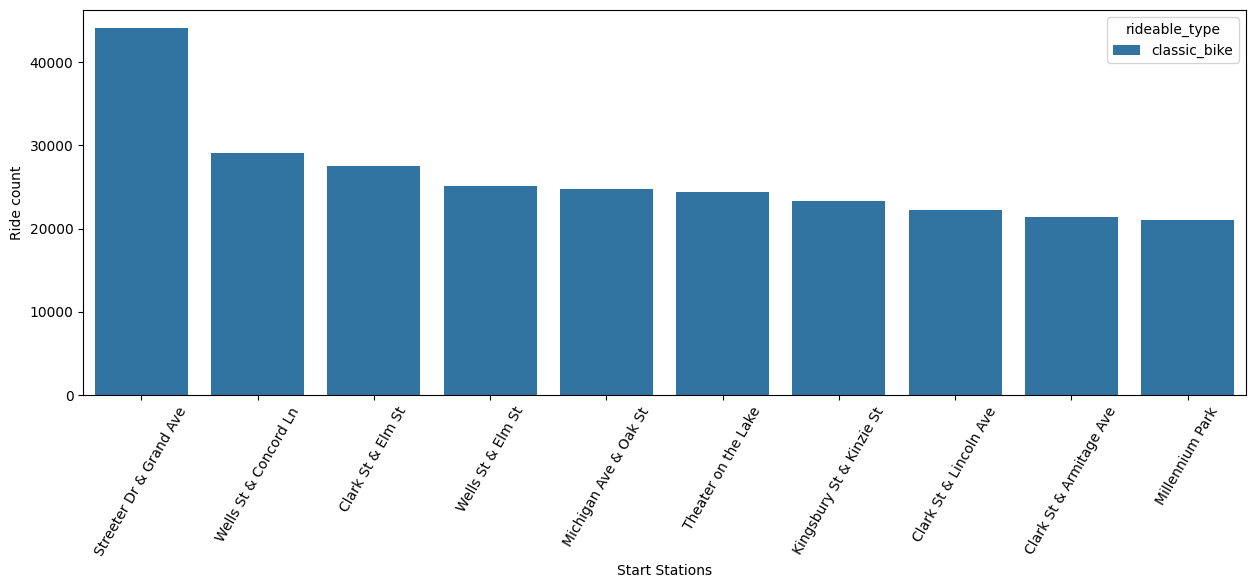

In [29]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(start_stx[:10],
                  x="start_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=60)
plt.xlabel("Start Stations")
plt.ylabel("Ride count")
plt.show()

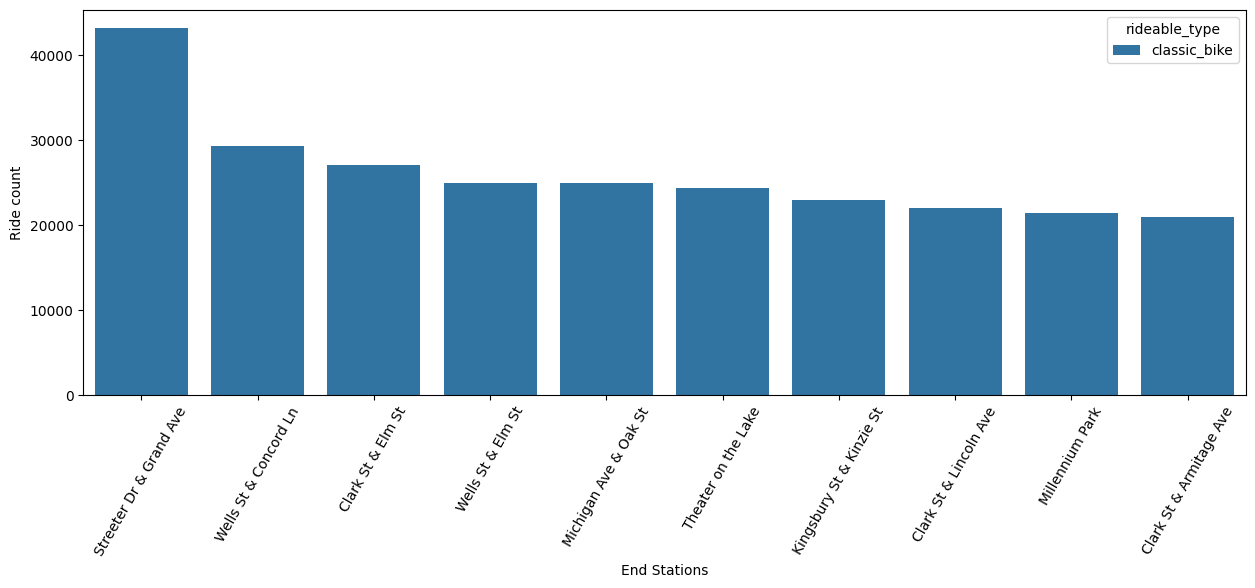

In [30]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(end_stx[:10],
                  x="end_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=60)
plt.xlabel("End Stations")
plt.ylabel("Ride count")
plt.show()

In [31]:
# Top routes
route_stx = bike_share_df.groupby(["start_station_name", "end_station_name"]).agg({
    "ride_id": "count",
    "total_distance_km": "mean"
}).reset_index().sort_values(by="ride_id", ascending=False)
route_stx["route"] = route_stx["start_station_name"] + " - " + route_stx["end_station_name"]

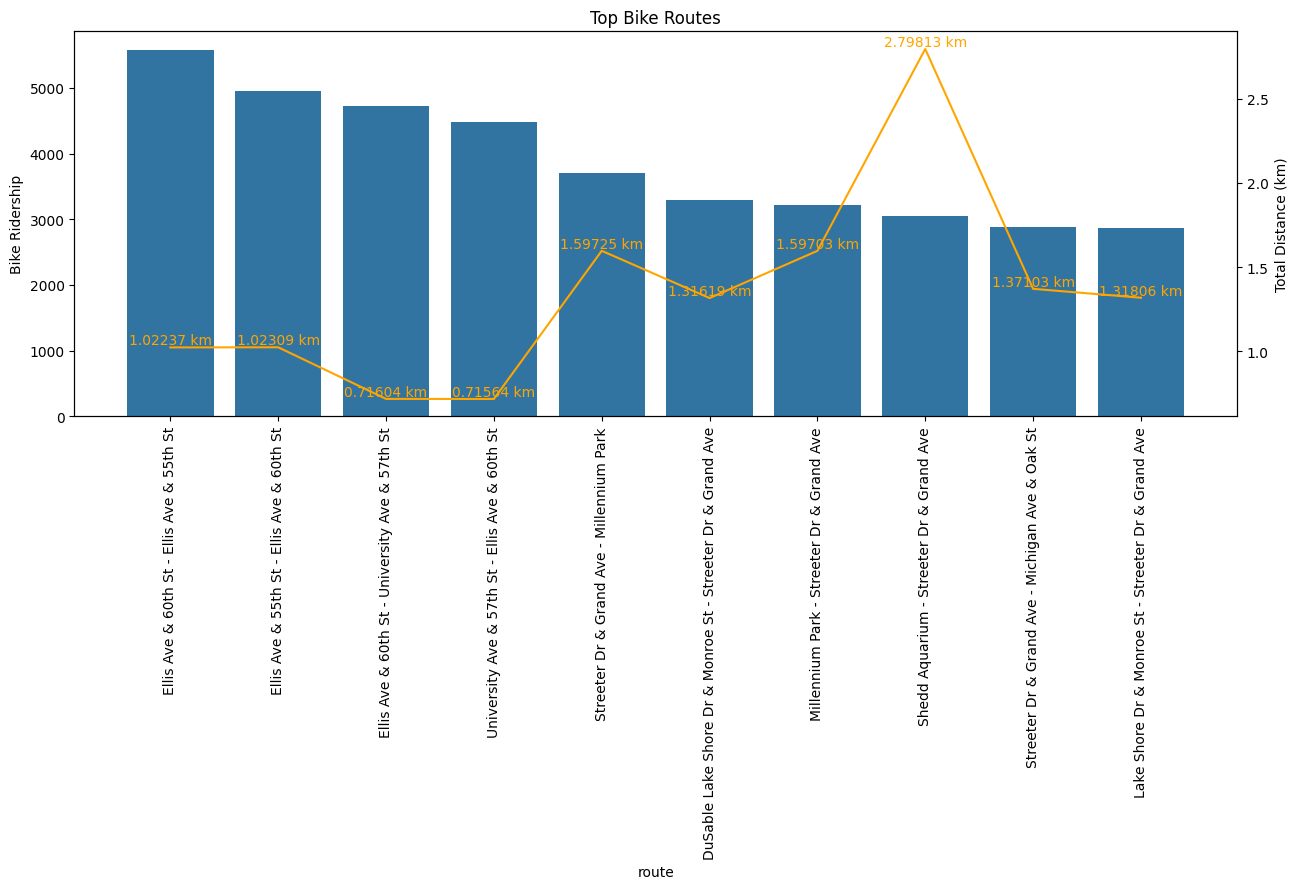

In [32]:
# plt.figure()
route_stx_10 = route_stx[:10]
fig, ax1 = plt.subplots(figsize=(15, 5))


sns.barplot(route_stx_10,
                  x="route",
                  y="ride_id",
                  ax=ax1)
ax1.set_ylabel("Bike Ridership")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
sns.lineplot(route_stx_10,
                  x="route",
                  y="total_distance_km",
                  ax=ax2,
                  color="orange")
ax2.set_ylabel("Total Distance (km)")


plt.title("Top Bike Routes")
for x, y in zip(route_stx_10["route"][:10], route_stx_10["total_distance_km"][:10]):
    ax2.text(x, y, f'{y:.5f} km', color='orange', ha='center', va='bottom')
plt.show()

From the derived top routes and its corresponding distance covered, we can infer that there are errors encountered during data collection. It can be suggested that there are gps sensors that still working even if its not traversing the road. There are routes that covers less than 9 meters and didn't move from its origin station. Because of this we have to drop the rows that have the same origin and destination.

### Dropping error records

In [33]:
bike_share_df = bike_share_df[bike_share_df['start_station_name'] != bike_share_df['end_station_name']]

In [34]:
# Top origin
start_stx = bike_share_df.groupby(["start_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)
end_stx = bike_share_df.groupby(["end_station_name", "rideable_type"]).count()["ride_id"].reset_index().sort_values(by="ride_id", ascending=False)

## **Top origin stations**

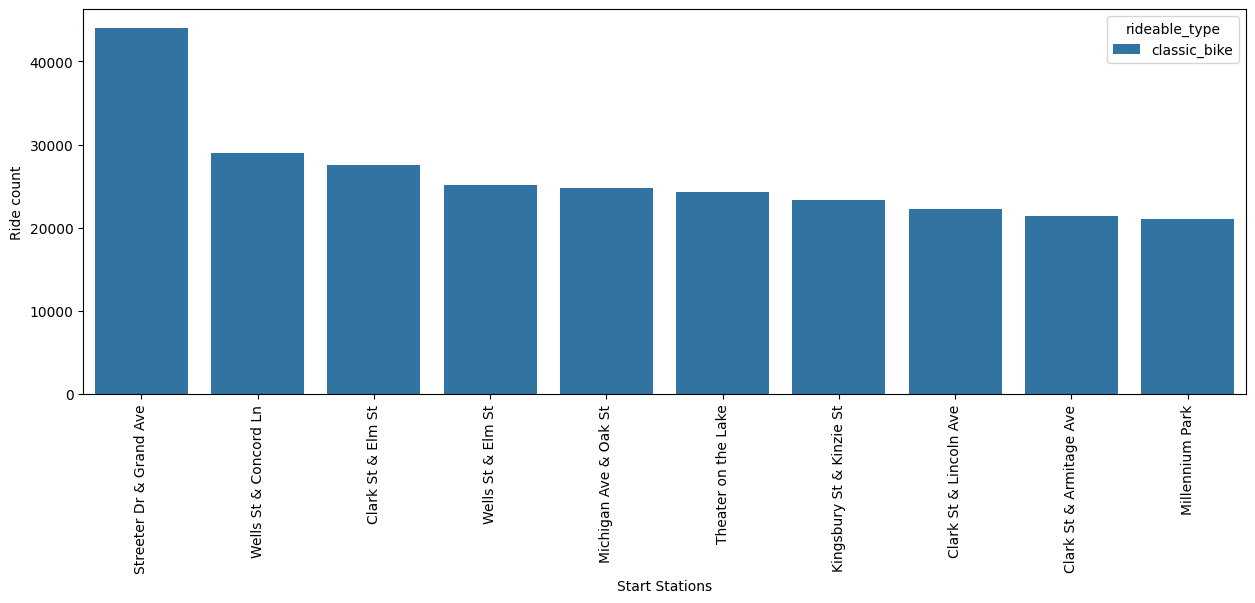

In [36]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(start_stx[:10],
                  x="start_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=90)
plt.xlabel("Start Stations")
plt.ylabel("Ride count")
plt.show()

## **Top destination station**

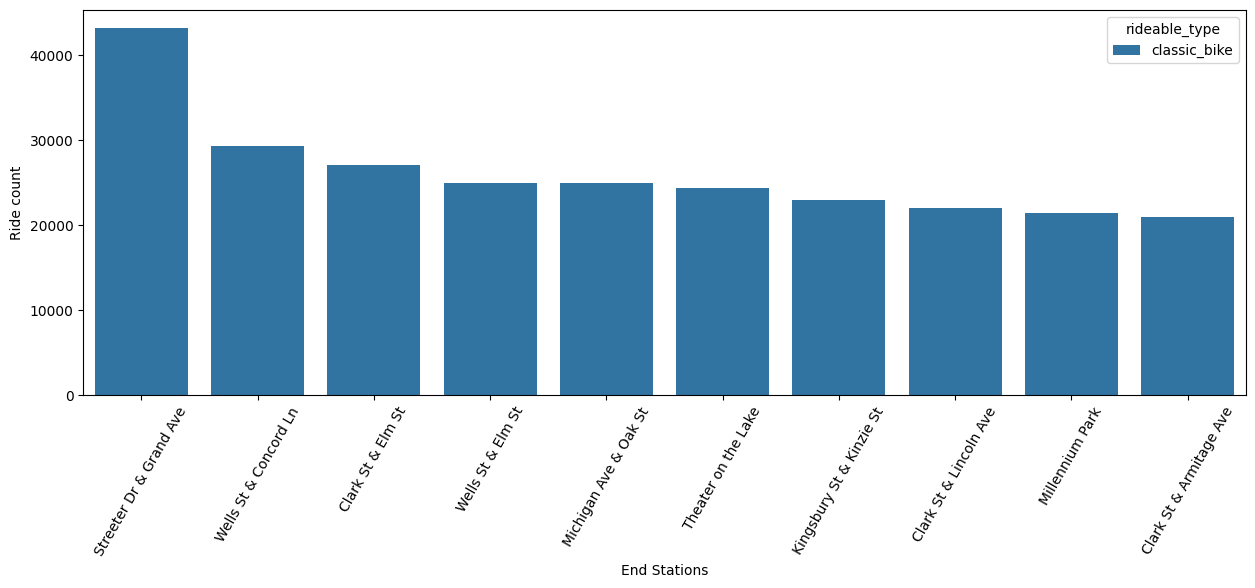

In [37]:
plt.figure(figsize=(15, 5))
fig = sns.barplot(end_stx[:10],
                  x="end_station_name",
                  y="ride_id",
                  hue="rideable_type")
plt.xticks(rotation=60)
plt.xlabel("End Stations")
plt.ylabel("Ride count")
plt.show()

## **Top Routes**

In [38]:
# Top routes
route_stx = bike_share_df.groupby(["start_station_name", "end_station_name"]).agg({
    "ride_id": "count",
    "total_distance_km": "mean"
}).reset_index().sort_values(by="ride_id", ascending=False)
route_stx["route"] = route_stx["start_station_name"] + " - " + route_stx["end_station_name"]

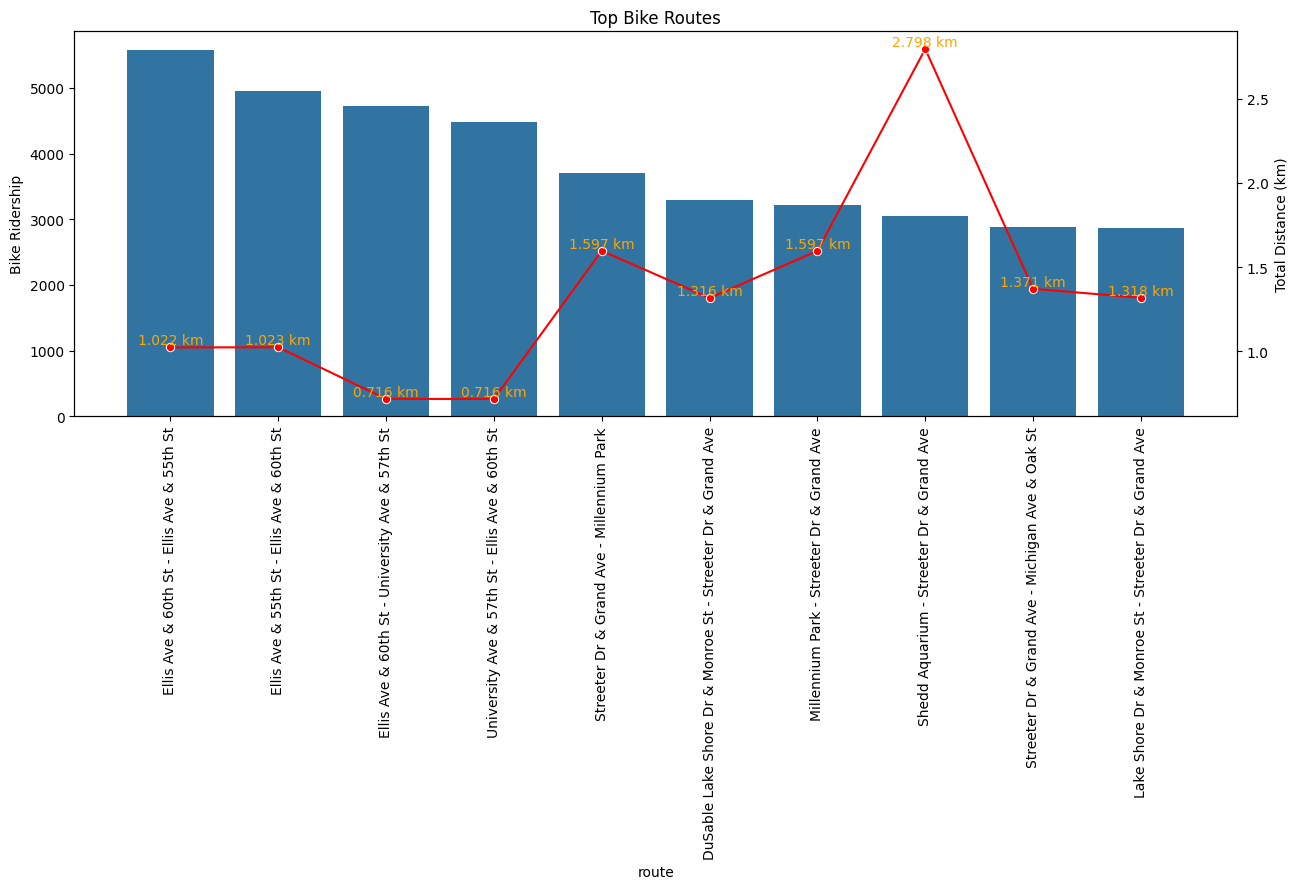

In [41]:
# plt.figure()
route_stx_10 = route_stx[:10]
fig, ax1 = plt.subplots(figsize=(15, 5))


sns.barplot(route_stx_10,
                  x="route",
                  y="ride_id",
                  ax=ax1)
ax1.set_ylabel("Bike Ridership")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
sns.lineplot(route_stx_10,
                  x="route",
                  y="total_distance_km",
                  ax=ax2,
                  color="red",
             marker="o")
ax2.set_ylabel("Total Distance (km)")


plt.title("Top Bike Routes")
for x, y in zip(route_stx_10["route"][:10], route_stx_10["total_distance_km"][:10]):
    ax2.text(x, y, f'{y:.3f} km', color='orange', ha='center', va='bottom')
plt.show()

Top routes for bike sharing consists of short distance transport that ranges from 0.716 km to 2.798 km.

## **Ridership**

In [42]:
bike_share_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'travel_time_mins', 'travel_time_days',
       'total_distance_km', 'travel_velocity_kms', 'start_hour_at',
       'start_day_at'],
      dtype='object')

In [47]:
ride_count = bike_share_df.groupby(["start_hour_at", "start_day_at", "start_weekday"]).count()["ride_id"].reset_index()
ride_avg = ride_count.groupby(["start_hour_at", "start_weekday"]).mean()["ride_id"].reset_index()
ride_avg

,start_hour_at,start_weekday,ride_id
0,0,Friday,327.290323
1,0,Monday,219.387097
2,0,Saturday,701.419355
3,0,Sunday,828.193548
4,0,Thursday,219.193548
...,...,...,...
163,23,Saturday,964.677419
164,23,Sunday,380.258065
165,23,Thursday,568.806452
166,23,Tuesday,376.645161


Text(0.5, 1.0, 'Hourly Bike Ridership per Day')

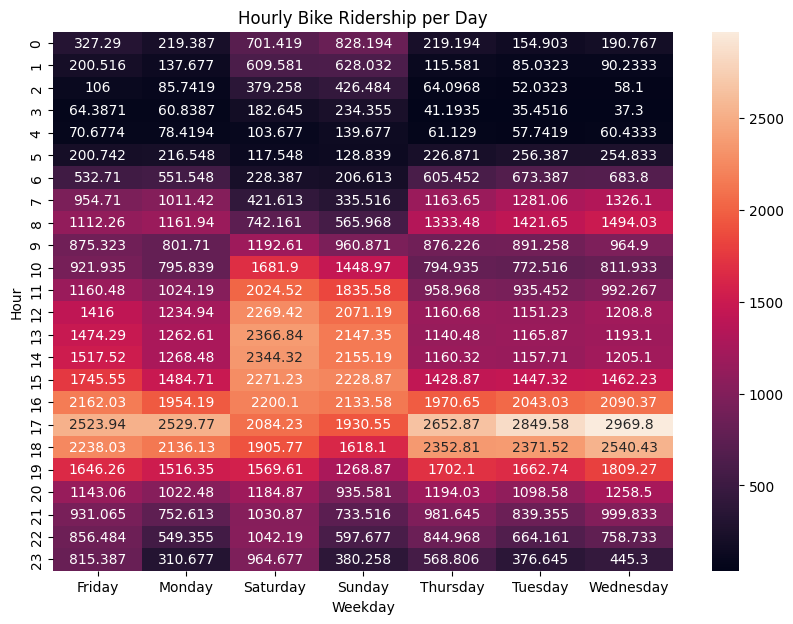

In [49]:
ride_avg_pivot = ride_avg.pivot_table(
    index = "start_hour_at",
    columns = "start_weekday",
    values = "ride_id"
)

plt.figure(figsize=(10,7))
sns.heatmap(ride_avg_pivot, annot=True, fmt="g")
plt.ylabel("Hour")
plt.xlabel("Weekday")
plt.title("Hourly Bike Ridership per Day")

- Ridership for weekday has two peaks:
  - 8 AM between 1112 to 1494 rides
  - 5 PM between 2523 to 2969 rides
- Ridership for weekend has a wider peak. For both Saturday and Sunday bikers has longer hour of activities which started from 10 AM to 7 PM.

In [ ]:
fail

## **Long distance Travel**

In [ ]:
long_distance = bike_share_df.groupby(["rideable_type"]).agg({
    'total_distance_km':'mean'
})
long_distance